In [1]:
import dask_awkward as dak
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
# sample = "vbf_powheg"
sample = "ggh_powheg"
# sample = "dy_M-100To200"
# sample = "data_A"
# full_load_path = load_path+f"/{sample}/*/*.parquet"
# full_load_path = load_path+f"/{sample}/0/*.parquet"
full_load_path = f"/depot/cms/users/yun79/hmm/test_validation_singleBigV1/stage1_output/2018/{sample}/*.parquet"

df_new = dak.from_parquet(full_load_path) 
# region_cut = (df_new.h_peak | df_new.h_sidebands)
# df_new = df_new[region_cut]

In [2]:
full_load_path = f"/depot/cms/users/yun79/hmm/test_validation_manyBigV1/stage1_output/2018/{sample}/*.parquet"
import dask.dataframe as dd
import pandas as pd
# df = dd.from_pandas(pd.DataFrame(), npartitions=1)
df_old = dd.read_parquet(full_load_path)
# region = df_old.region.compute()

In [3]:
weights_new = df_new["weights"].compute()
# if "ggh" in sample:
#     print("ggh in sample!")
#     nnlops_full_load_path = f'/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/0/nnlops/wgt.parquet'
#     nnlops_wgts = ak.from_parquet(nnlops_full_load_path)["nnlops_wgt"]
#     weights_new = weights_new*nnlops_wgts
print(weights_new)
print(ak.num(weights_new, axis=0))
weights_old = df_old["weights"].compute()
print(weights_old)
print(weights_old.shape)
print(max(weights_new))
print(min(weights_new))
print(max(weights_old))
print(min(weights_old))
print(max(abs(weights_new[:]-weights_old)/weights_old))
print(np.mean(abs(weights_new[:]-weights_old)))
print(np.median(abs(weights_new[:]-weights_old)))
# print(max(abs(weights_new[:-3]-weights_old)/weights_old))
# print(np.mean(abs(weights_new[:-3]-weights_old)/weights_old))
# print(np.median(abs(weights_new[:-3]-weights_old)/weights_old))
# print(max(abs(weights_new-weights_old[:-3])/weights_old[:-3]))
# print(np.mean(abs(weights_new-weights_old[:-3])/weights_old[:-3]))
# print(np.median(abs(weights_new-weights_old[:-3])/weights_old[:-3]))
# print(max(abs(weights_new-weights_old)/weights_old))
# print(np.mean(abs(weights_new-weights_old)/weights_old))

[0.00062, 0.000778, 0.000744, 0.000616, ..., 0.000627, 0.000565, 0.000632]
627147
entry
0        0.000592
1        0.000599
3        0.000715
4        0.000581
6        0.000720
           ...   
99892    0.000699
99893    0.000675
99897    0.000637
99898    0.000550
99899    0.001350
Name: weights, Length: 627147, dtype: float64
(627147,)
0.003411595335768824
-0.001503295248268616
0.003538329674086038
-0.001512267345377604
inf
9.189663989477661e-05
6.550657555718308e-05


/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [4]:
binning_map = {
    "pt" : [25, 300, 50],
    "eta" : [-5, 5, 30],
    "phi" : [-3.1415, 3.1415, 101],
    "mass" : [0, 150, 100],
}

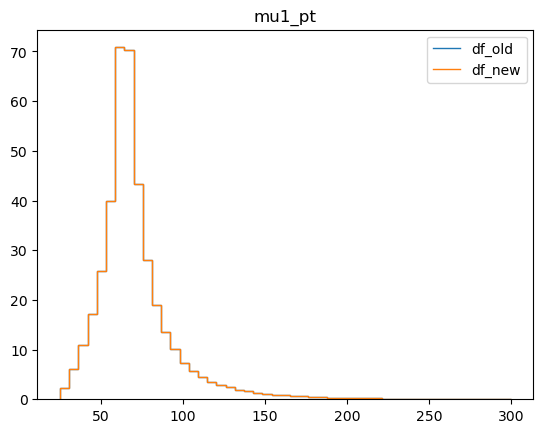

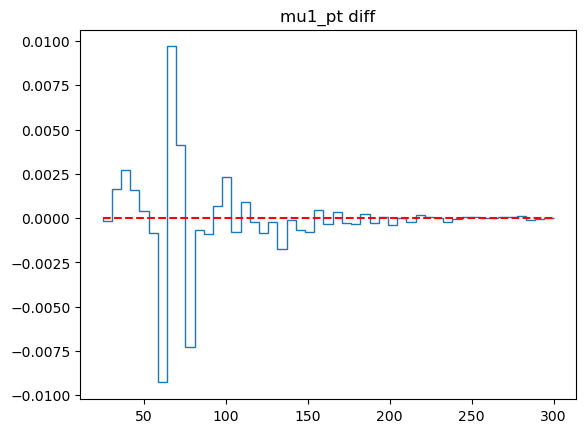

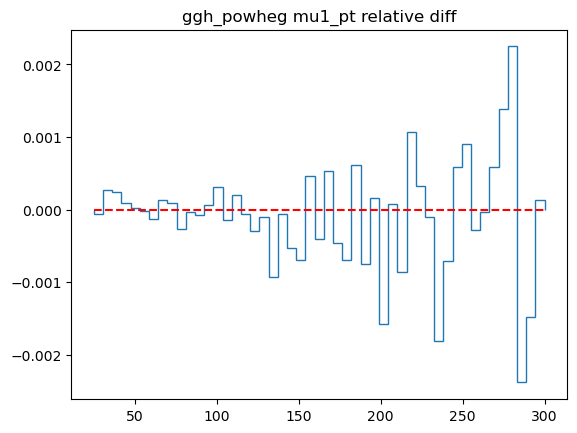

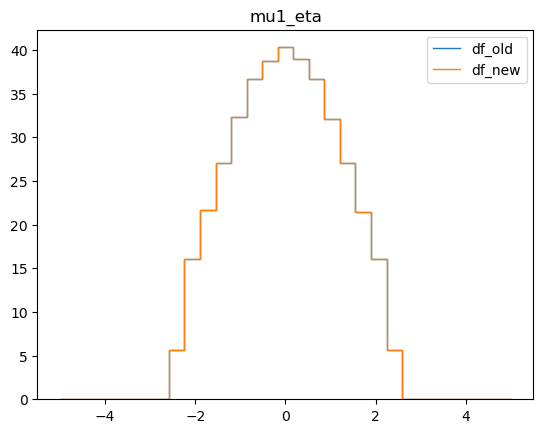

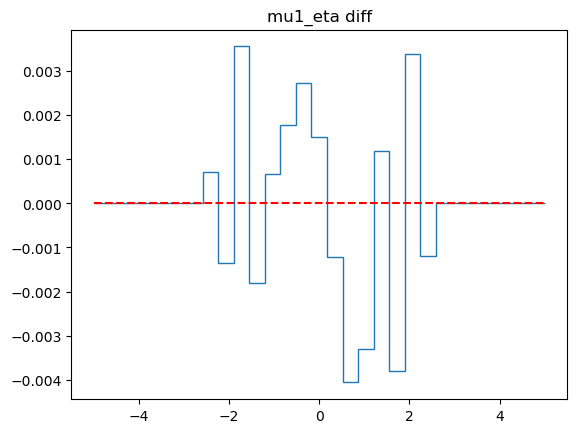

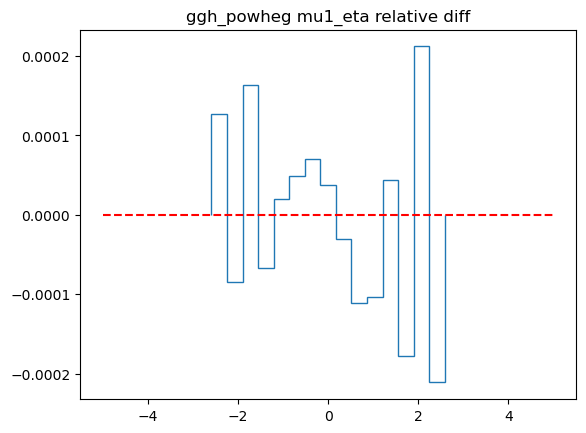

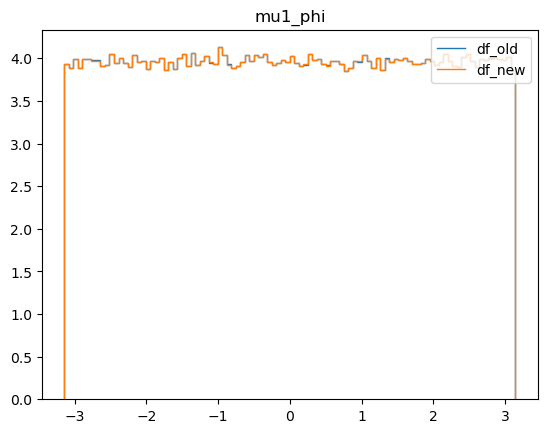

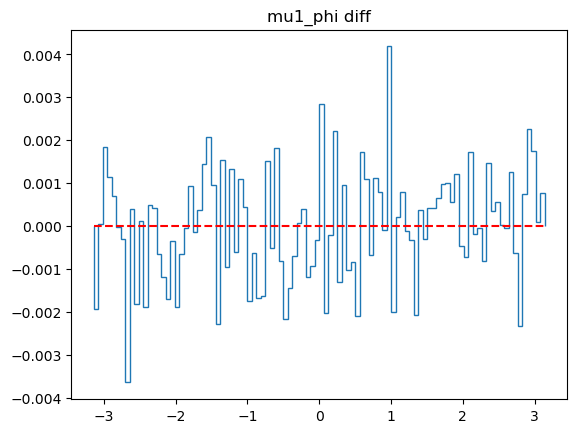

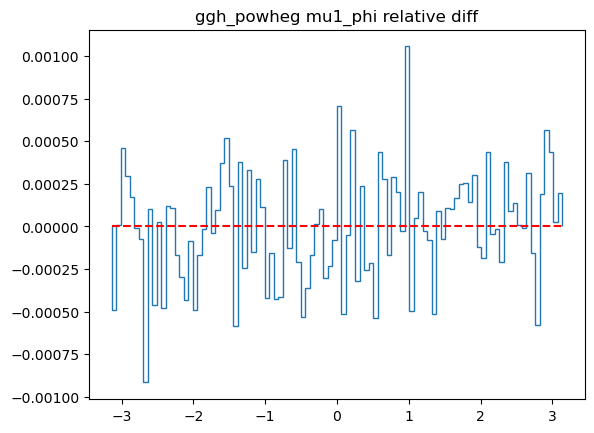

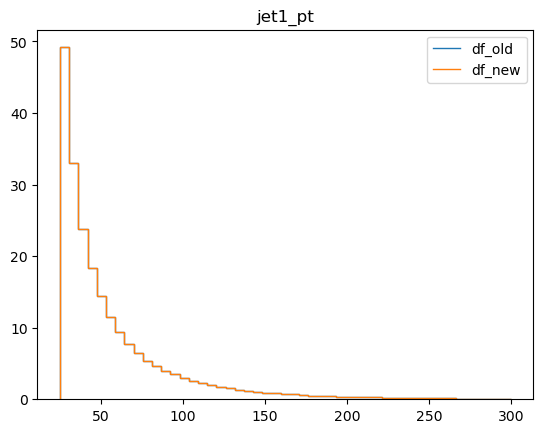

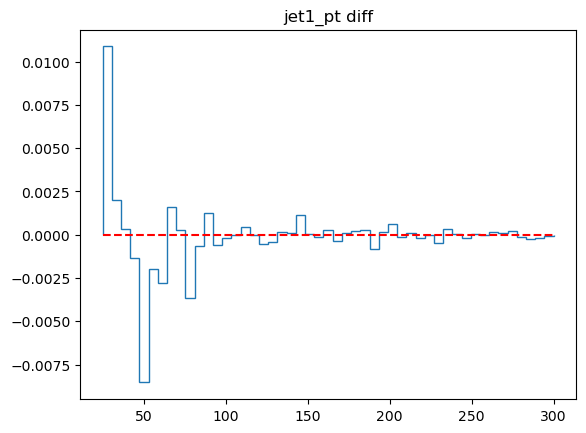

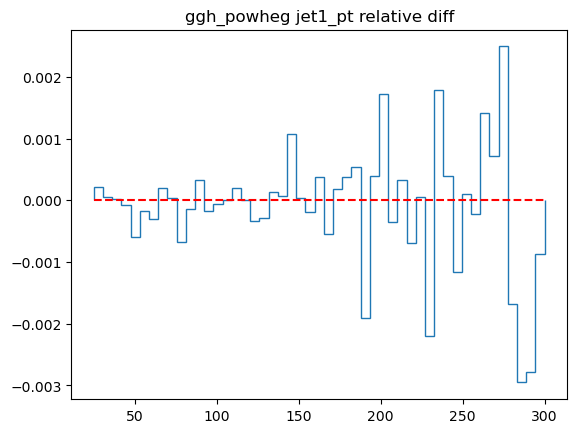

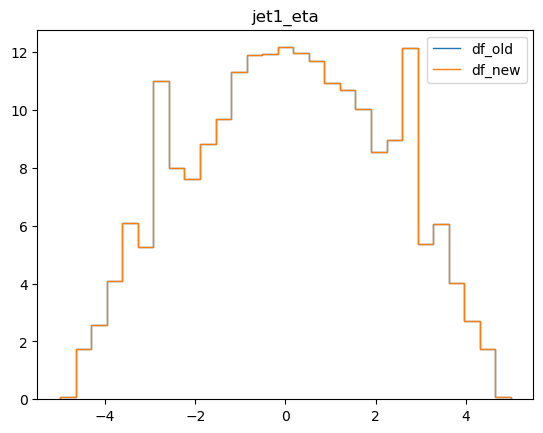

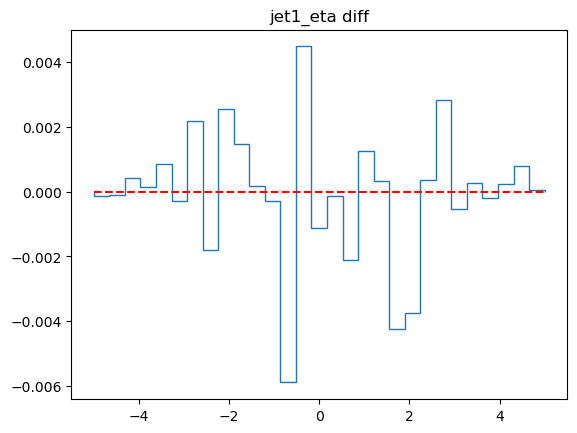

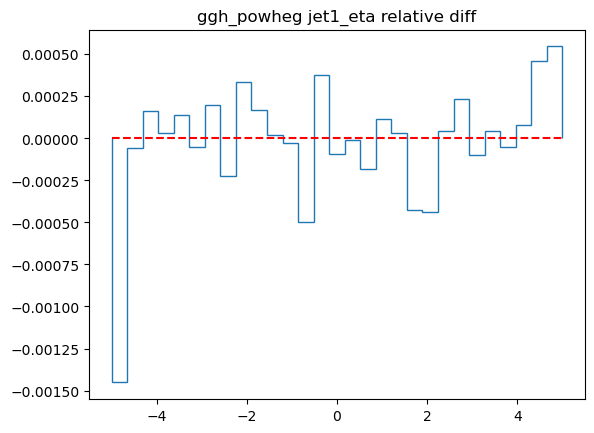

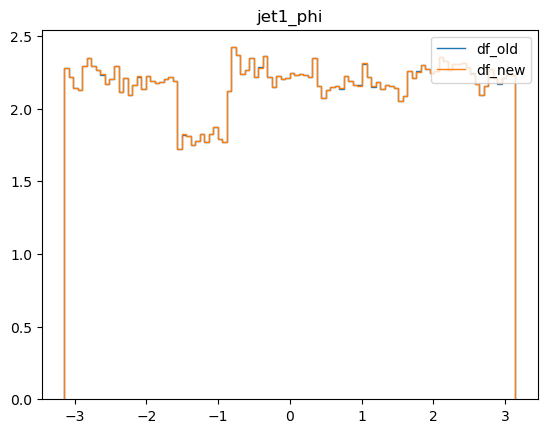

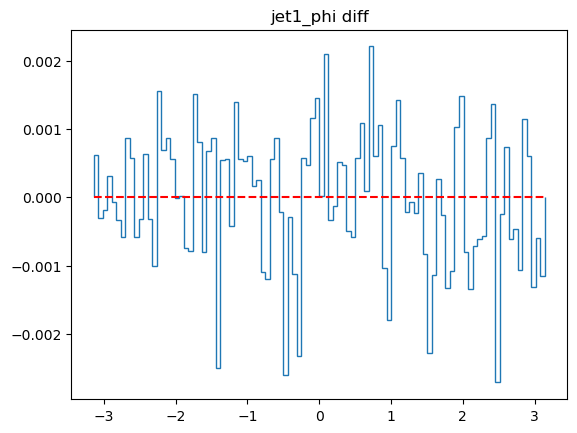

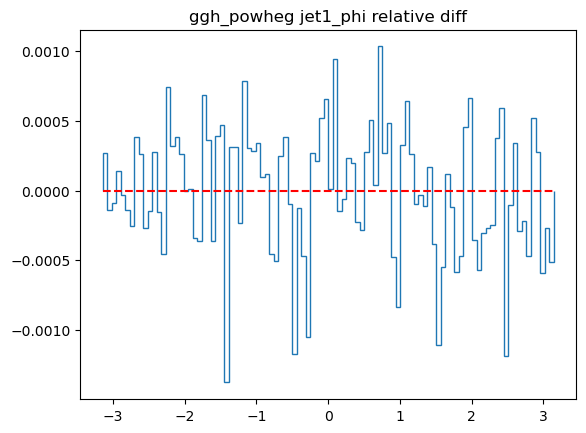

In [5]:
variables = ["mu1_pt","mu1_eta", "mu1_phi", 
             # "jet1_mass", 
             "jet1_pt", "jet1_eta", "jet1_phi"
            ]
weights_old = df_old["weights"].compute()
weights_new = ak.to_numpy(df_new["weights"].compute())
# if "ggh" in sample:
#     print("ggh in sample!")
#     nnlops_full_load_path = f'/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/0/nnlops/wgt.parquet'
#     nnlops_wgts = ak.from_parquet(nnlops_full_load_path)["nnlops_wgt"]
#     weights_new = weights_new*nnlops_wgts

for var in variables:
    kin = var.split("_")[-1]
    # binning = np.linspace(*[25, 300, 50])
    binning = np.linspace(*binning_map[kin])
    # old_len = ak.num(df_old["mu1_pt"].compute(), axis=0)
    # new_len = ak.num(df_new["mu1_pt"].compute(), axis=0)
    # new_weights = np.ones(new_len)
    # new_weights = new_weights*old_len/new_len
    hist_old, edges = np.histogram(df_old[var].compute(), bins=binning ,weights=weights_old)
    # hist_old, edges = np.histogram(df_old[var+"_nominal"].compute(), bins=binning )
    
    # hist_new, _= np.histogram(df_new[region_cut][var].compute(), bins=binning , weights=new_weights)
    hist_new, _= np.histogram(df_new[var].compute(), bins=binning ,weights=weights_new)
    
    plt.stairs(hist_old, edges, label = "df_old")
    plt.stairs(hist_new, edges, label = "df_new")
    plt.legend(loc="upper right")
    plt.title(var)
    plt.show()
    plt.stairs((hist_new-hist_old), edges)
    plt.title(var+" diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()
    plt.stairs((hist_new-hist_old)/hist_old, edges)
    plt.title(f"{sample} {var}"+" relative diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()

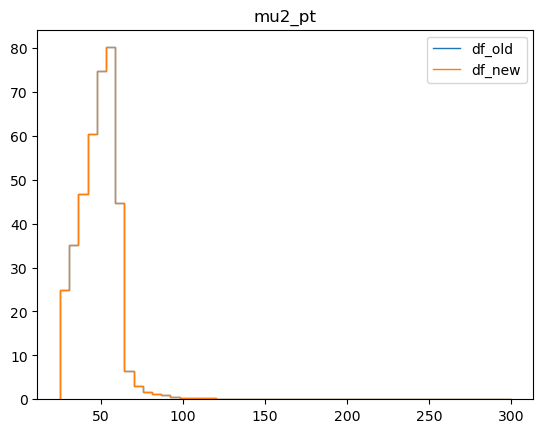

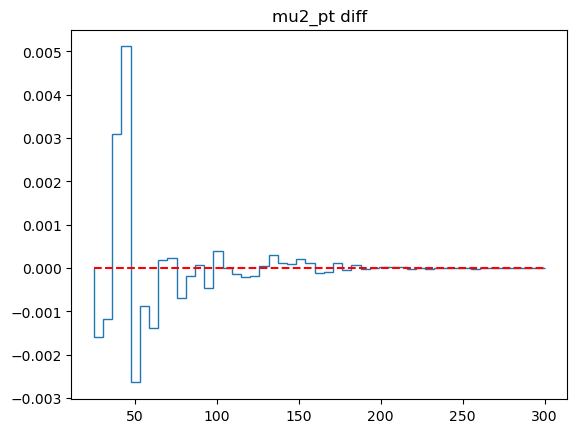

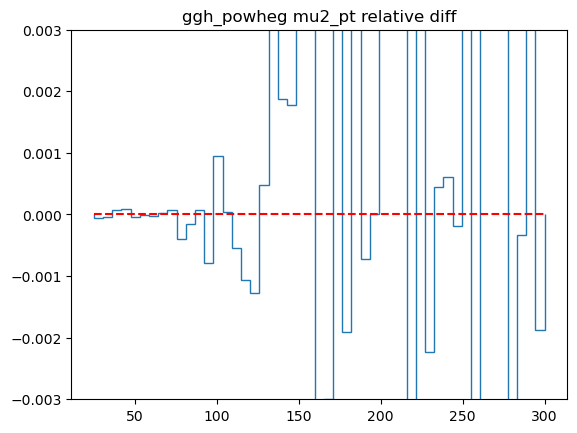

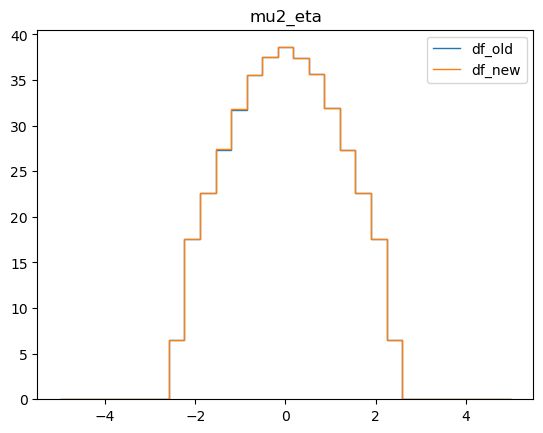

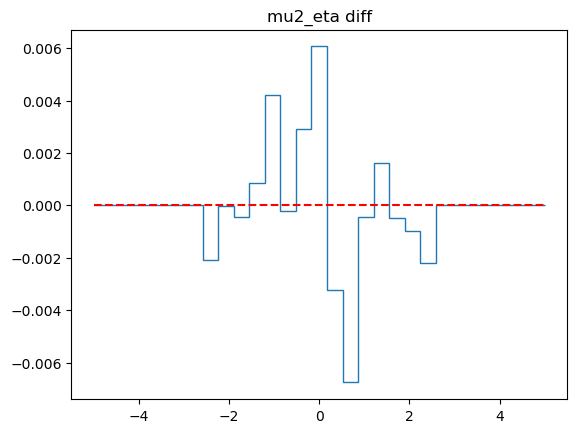

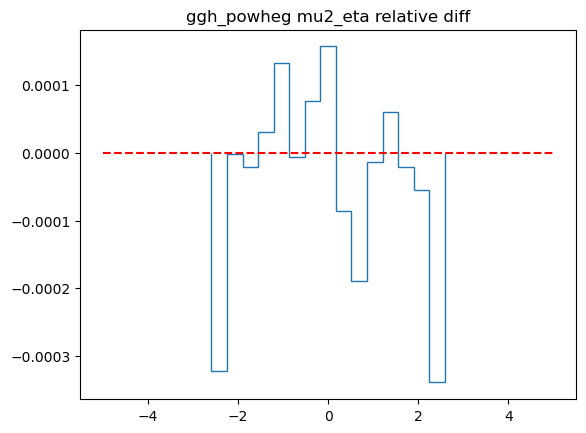

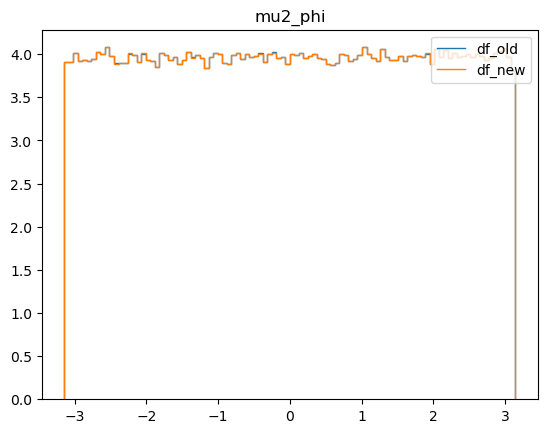

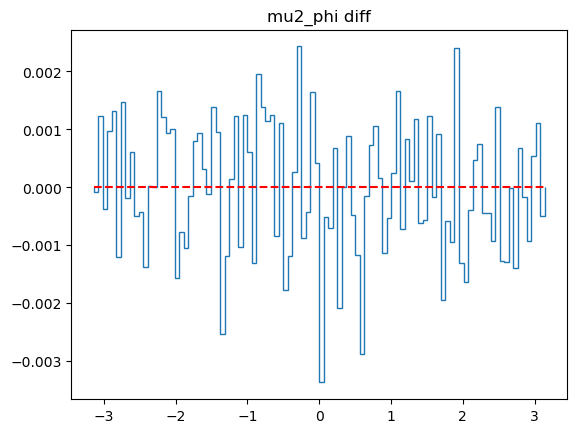

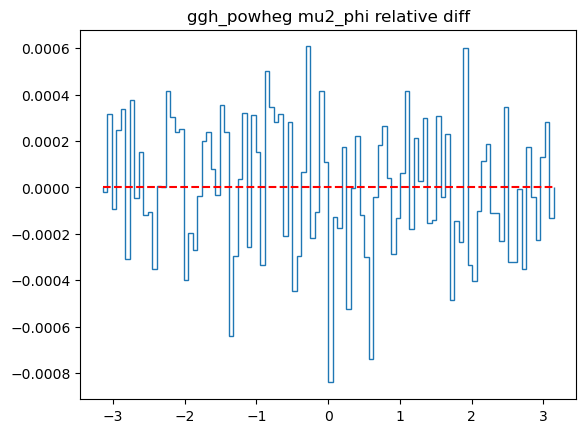

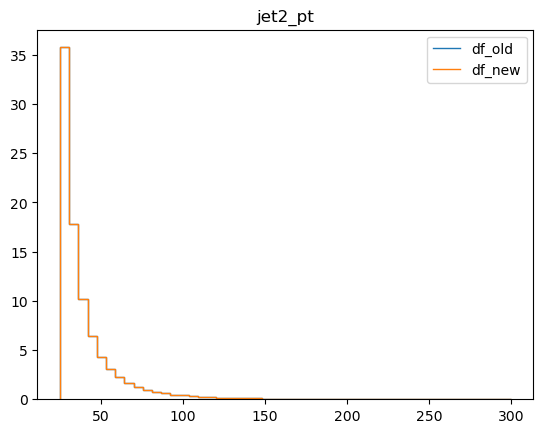

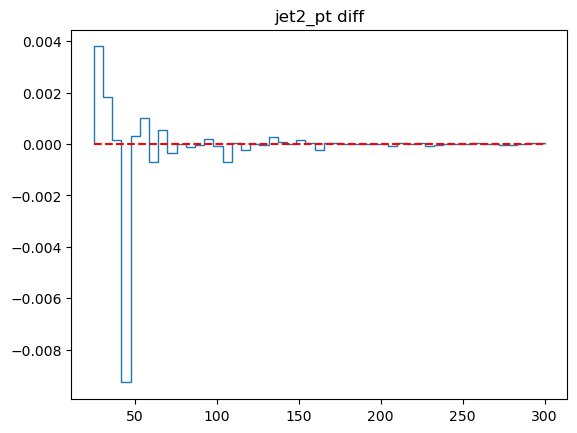

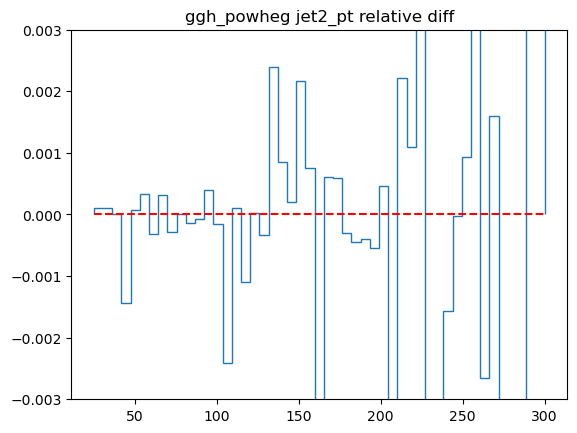

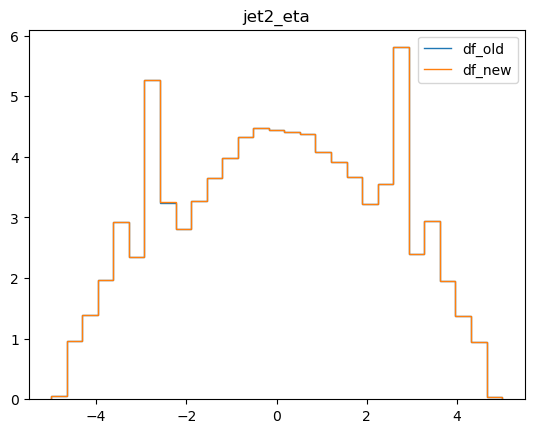

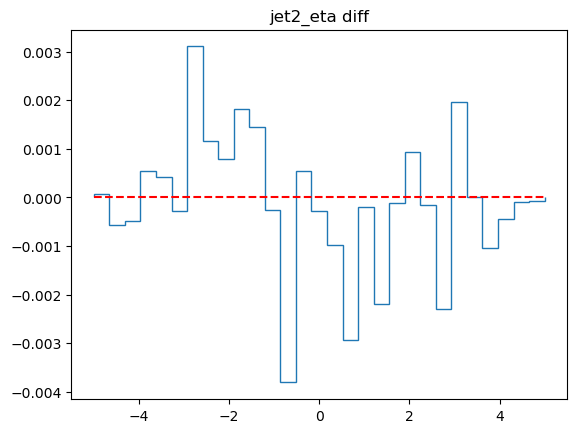

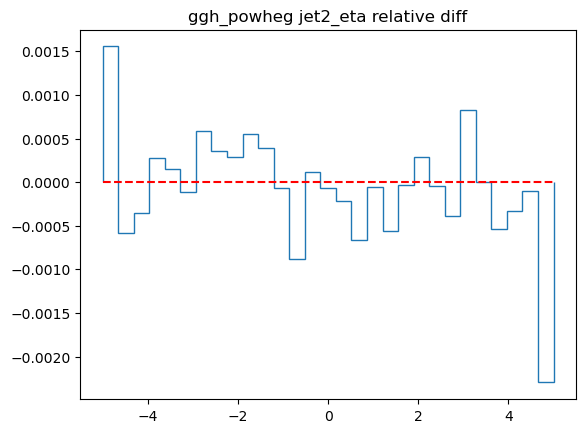

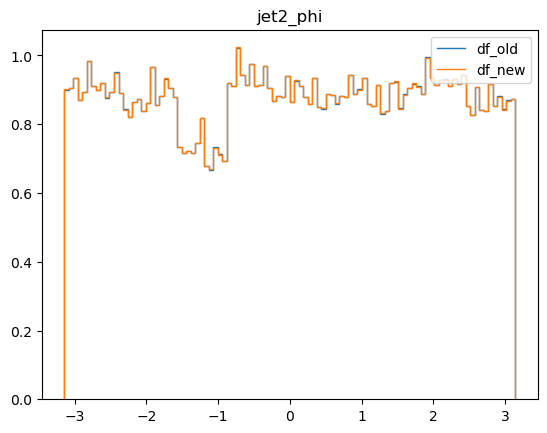

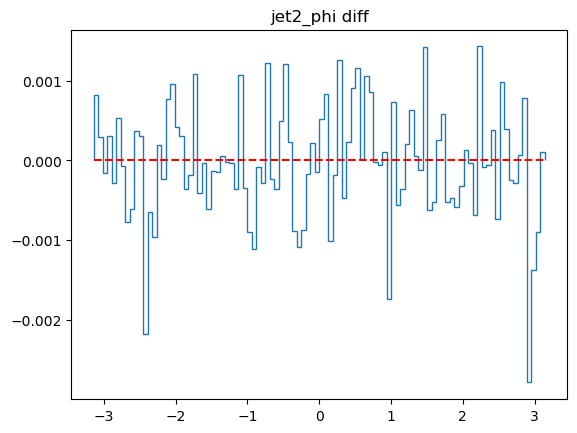

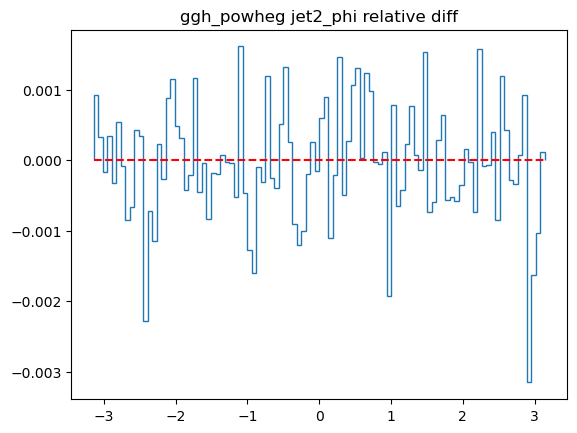

In [6]:
"""
For mu2, special condition is needed bc when there's only one muon, mu2==mu1 in copperhead
"""
# var = "mu1_pt"
# var = "dimuon_mass"
# var = "jet1_pt"
# variables = ["mu1_pt", "mu2_pt", "dimuon_mass"]
variables = ["mu2_pt","mu2_eta", "mu2_phi", 
             # "jet2_mass", 
             "jet2_pt", "jet2_eta", "jet2_phi"
            ]
weights_old = df_old["weights"].compute()
weights_new = ak.to_numpy(df_new["weights"].compute())
# if "ggh" in sample:
#     nnlops_full_load_path = f'/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/0/nnlops/wgt.parquet'
#     nnlops_wgts = ak.from_parquet(nnlops_full_load_path)["nnlops_wgt"]
#     weights_new = weights_new*nnlops_wgts
    
for var in variables:
    kin = var.split("_")[-1]
    # binning = np.linspace(*[25, 300, 50])
    binning = np.linspace(*binning_map[kin])
    # the way copperheadV1 defines mu2 is the muon with the lowest pt, thus the
    # only way to make copperheadV1 and copperheadV2 same is to ensure nmuons ==2
    # if 'mu' in var:
    #     nvars_new = df_new["nmuons"].compute()
    #     nvars_old = df_old["nmuons"].compute()
    # else:
    #     nvars_new = df_new["njets"].compute()
    #     nvars_old = df_old["njets"].compute()
    # hist_old, edges = np.histogram(df_old[nvars_old ==2][var].compute(), bins=binning , weights=weights_old[nvars_old ==2])
    # hist_new, _= np.histogram(df_new[nvars_new ==2][var].compute(), bins=binning , weights=weights_new[nvars_new ==2])
    hist_old, edges = np.histogram(df_old[var].compute(), bins=binning , weights=weights_old)
    hist_new, _= np.histogram(df_new[var].compute(), bins=binning , weights=weights_new)
    
    
    plt.stairs(hist_old, edges, label = "df_old")
    plt.stairs(hist_new, edges, label = "df_new")
    plt.legend(loc="upper right")
    plt.title(var)
    plt.show()
    plt.stairs((hist_new-hist_old), edges)
    plt.title(var+" diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()
    plt.stairs((hist_new-hist_old)/hist_old, edges)
    if "pt" in var:
        plt.ylim(-0.003, 0.003)
    plt.title(f"{sample} {var}"+" relative diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()

In [11]:
"""
testing the same but with copperheadV2
"""

import dask_awkward as dak
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
# sample = "vbf_powheg"
sample = "ggh_powheg"
# sample = "dy_M-100To200"
# sample = "data_A"
# full_load_path = load_path+f"/{sample}/*/*.parquet"
# full_load_path = load_path+f"/{sample}/0/*.parquet"
full_load_path = f"/depot/cms/users/yun79/results/stage1/singleBig/2018/f1_0/{sample}/0/*.parquet"

df_new = dak.from_parquet(full_load_path) 
# region_cut = (df_new.h_peak | df_new.h_sidebands)
# df_new = df_new[region_cut]
full_load_path = f"/depot/cms/users/yun79/results/stage1/manyBig/2018/f1_0/{sample}/0/*.parquet"
# df = dd.from_pandas(pd.DataFrame(), npartitions=1)
df_old = dak.from_parquet(full_load_path)
# region = df_old.region.compute()

In [13]:
weights_new = df_new["weights"].compute()
# if "ggh" in sample:
#     print("ggh in sample!")
#     nnlops_full_load_path = f'/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/0/nnlops/wgt.parquet'
#     nnlops_wgts = ak.from_parquet(nnlops_full_load_path)["nnlops_wgt"]
#     weights_new = weights_new*nnlops_wgts
print(weights_new)
print(ak.num(weights_new, axis=0))
weights_old = df_old["weights"].compute()
print(weights_old)
print(ak.num(weights_old, axis=0))
print(max(weights_new))
print(min(weights_new))
print(max(weights_old))
print(min(weights_old))
print(max(abs(weights_new[:]-weights_old)/weights_old))
print(np.mean(abs(weights_new[:]-weights_old)))
print(np.median(abs(weights_new[:]-weights_old)))
# print(max(abs(weights_new[:-3]-weights_old)/weights_old))
# print(np.mean(abs(weights_new[:-3]-weights_old)/weights_old))
# print(np.median(abs(weights_new[:-3]-weights_old)/weights_old))
# print(max(abs(weights_new-weights_old[:-3])/weights_old[:-3]))
# print(np.mean(abs(weights_new-weights_old[:-3])/weights_old[:-3]))
# print(np.median(abs(weights_new-weights_old[:-3])/weights_old[:-3]))
# print(max(abs(weights_new-weights_old)/weights_old))
# print(np.mean(abs(weights_new-weights_old)/weights_old))

[0.000604, 0.000683, 0.000658, 0.00064, ..., 0.000624, 0.000633, 0.00068]
627147
[0.000604, 0.000683, 0.000658, 0.00064, ..., 0.000624, 0.000633, 0.00068]
627147
0.0008938533636777344
-0.0008209399552396656
0.0008938533636777344
-0.0008209399552396656
0.0
0.0
0.0


In [14]:
binning_map = {
    "pt" : [25, 300, 50],
    "eta" : [-5, 5, 30],
    "phi" : [-3.1415, 3.1415, 101],
    "mass" : [0, 150, 100],
}

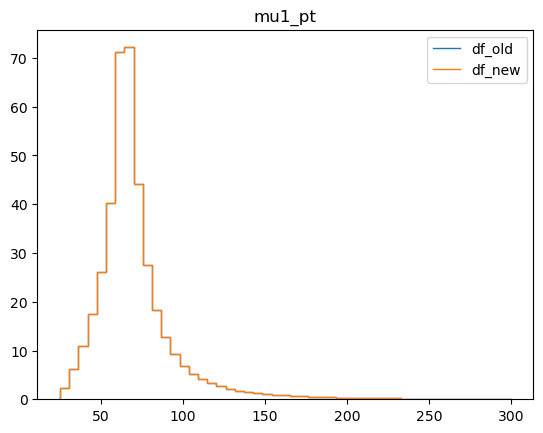

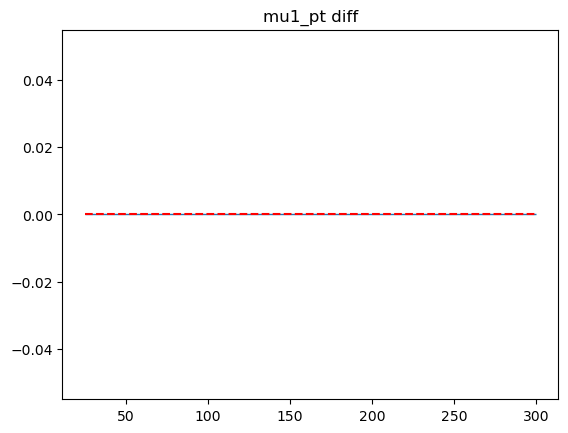

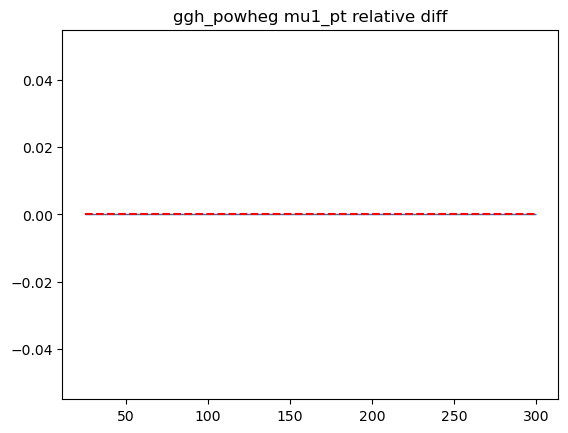

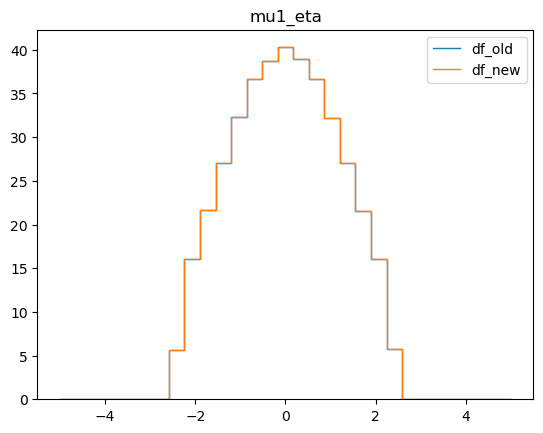

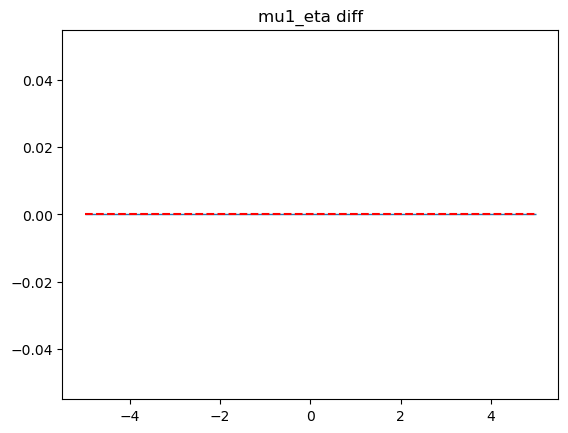

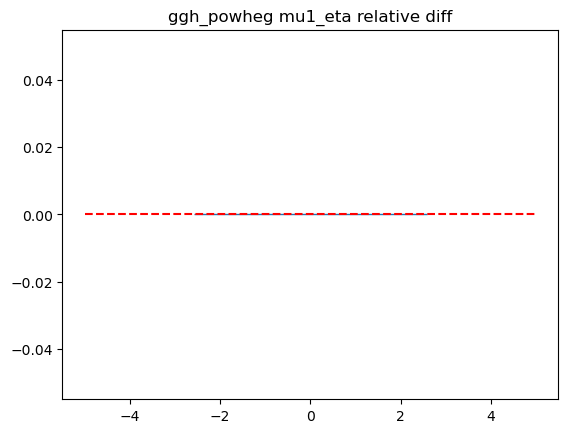

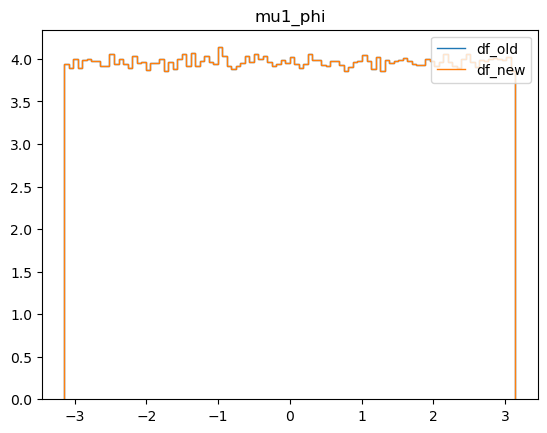

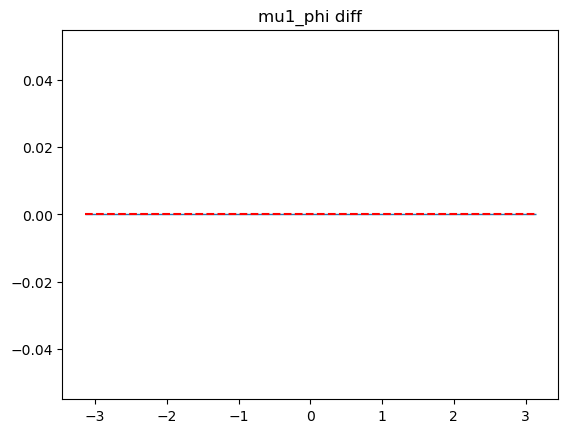

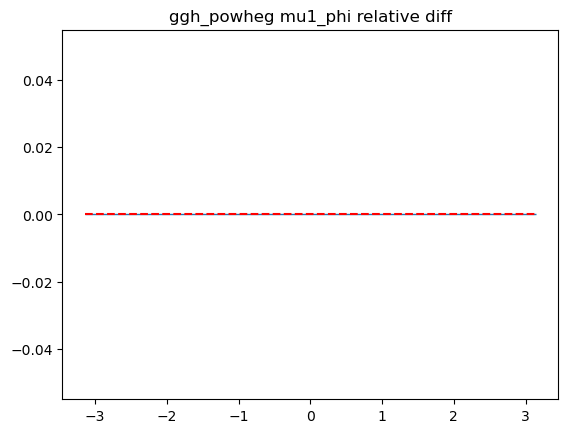

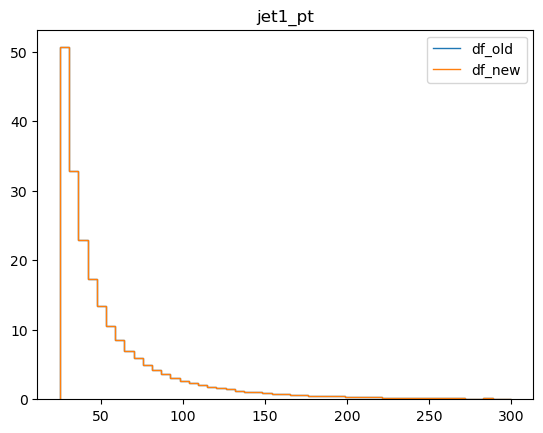

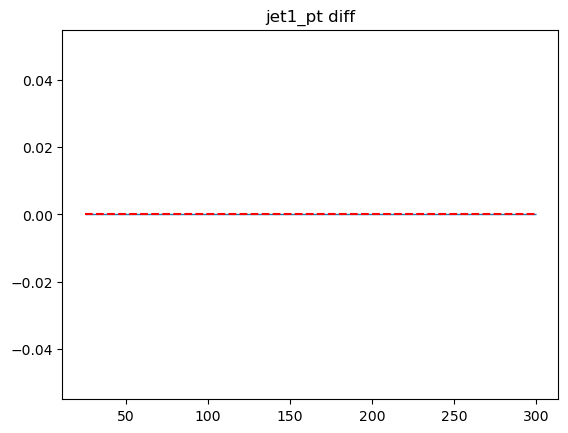

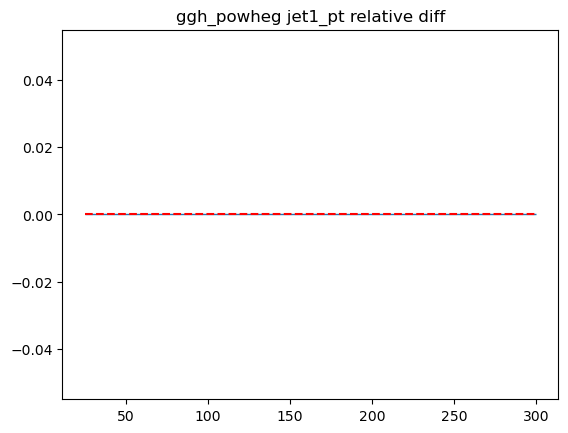

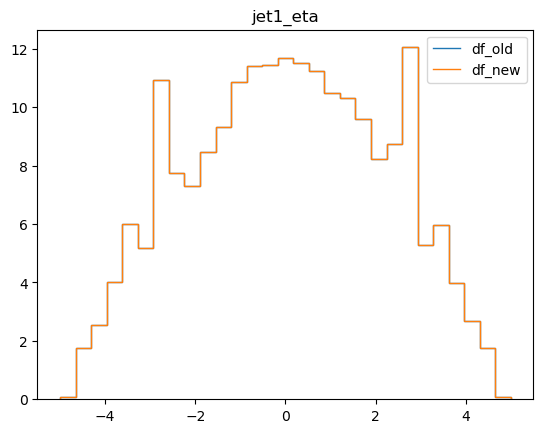

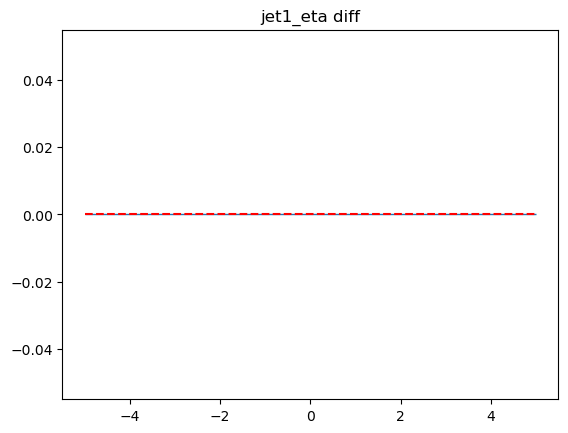

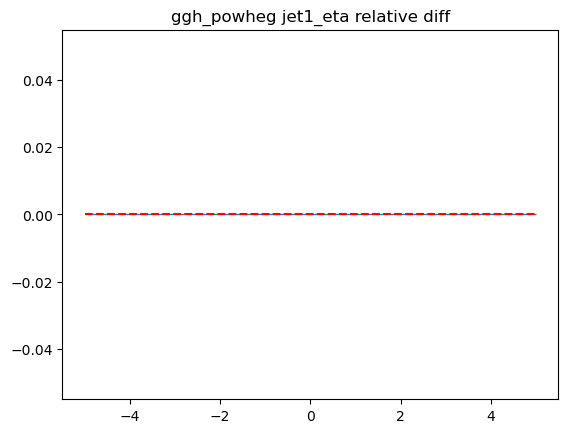

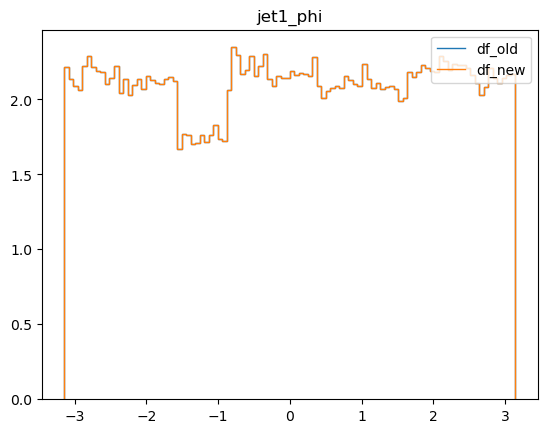

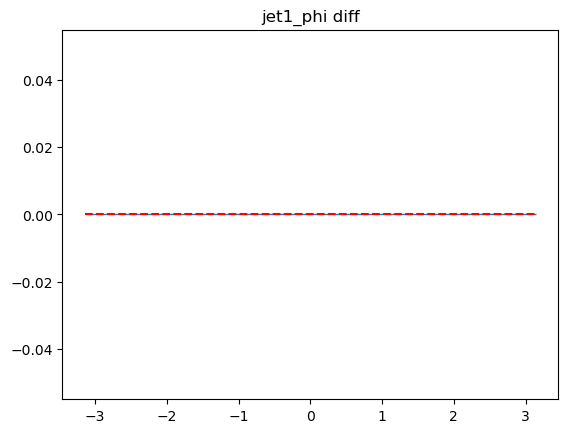

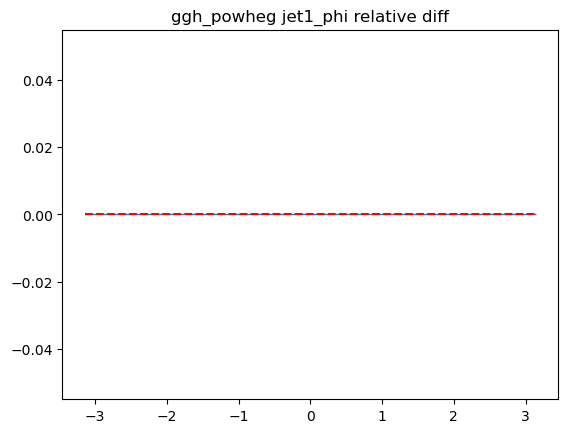

In [15]:
variables = ["mu1_pt","mu1_eta", "mu1_phi", 
             # "jet1_mass", 
             "jet1_pt", "jet1_eta", "jet1_phi"
            ]
weights_old = df_old["weights"].compute()
weights_new = ak.to_numpy(df_new["weights"].compute())
# if "ggh" in sample:
#     print("ggh in sample!")
#     nnlops_full_load_path = f'/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/0/nnlops/wgt.parquet'
#     nnlops_wgts = ak.from_parquet(nnlops_full_load_path)["nnlops_wgt"]
#     weights_new = weights_new*nnlops_wgts

for var in variables:
    kin = var.split("_")[-1]
    # binning = np.linspace(*[25, 300, 50])
    binning = np.linspace(*binning_map[kin])
    # old_len = ak.num(df_old["mu1_pt"].compute(), axis=0)
    # new_len = ak.num(df_new["mu1_pt"].compute(), axis=0)
    # new_weights = np.ones(new_len)
    # new_weights = new_weights*old_len/new_len
    hist_old, edges = np.histogram(df_old[var].compute(), bins=binning ,weights=weights_old)
    # hist_old, edges = np.histogram(df_old[var+"_nominal"].compute(), bins=binning )
    
    # hist_new, _= np.histogram(df_new[region_cut][var].compute(), bins=binning , weights=new_weights)
    hist_new, _= np.histogram(df_new[var].compute(), bins=binning ,weights=weights_new)
    
    plt.stairs(hist_old, edges, label = "df_old")
    plt.stairs(hist_new, edges, label = "df_new")
    plt.legend(loc="upper right")
    plt.title(var)
    plt.show()
    plt.stairs((hist_new-hist_old), edges)
    plt.title(var+" diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()
    plt.stairs((hist_new-hist_old)/hist_old, edges)
    plt.title(f"{sample} {var}"+" relative diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()

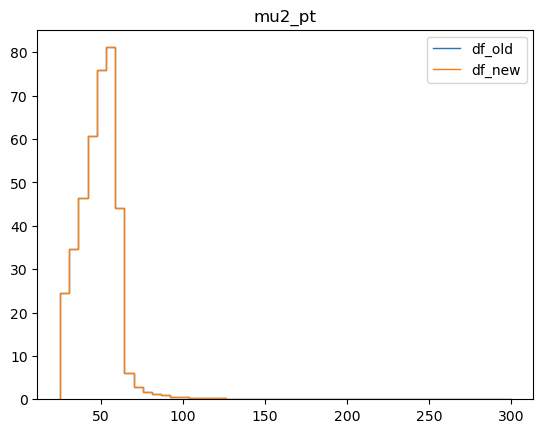

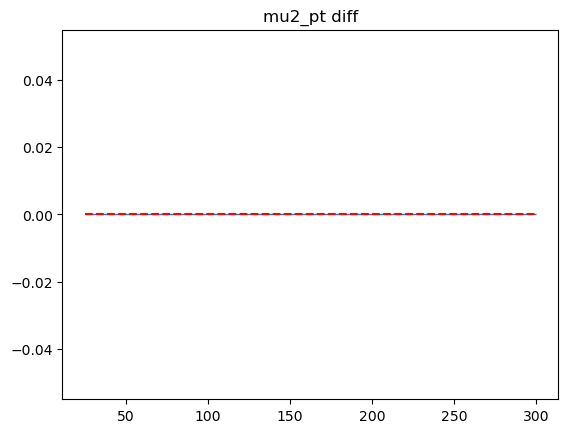

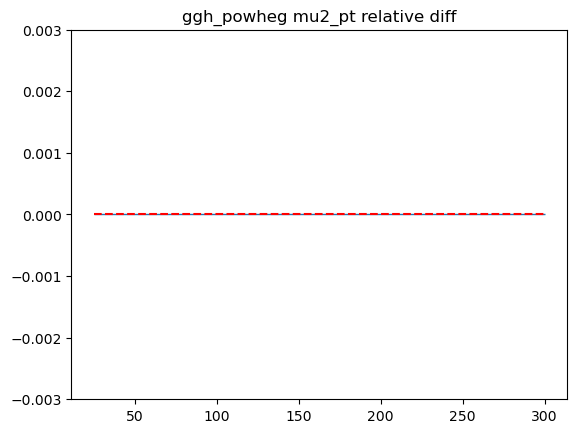

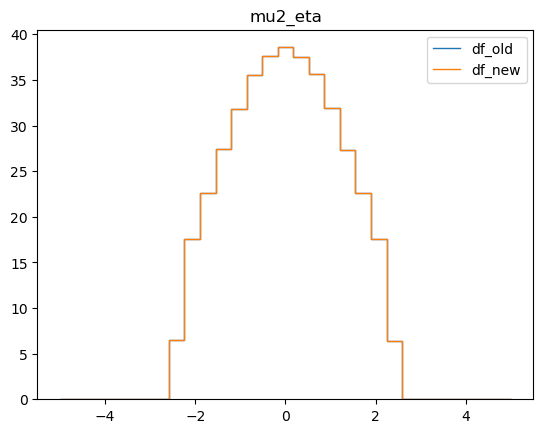

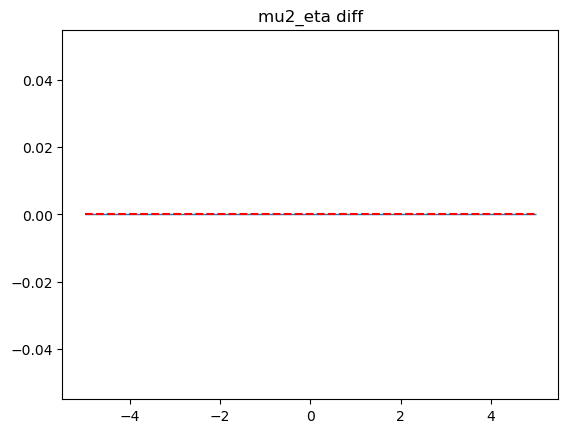

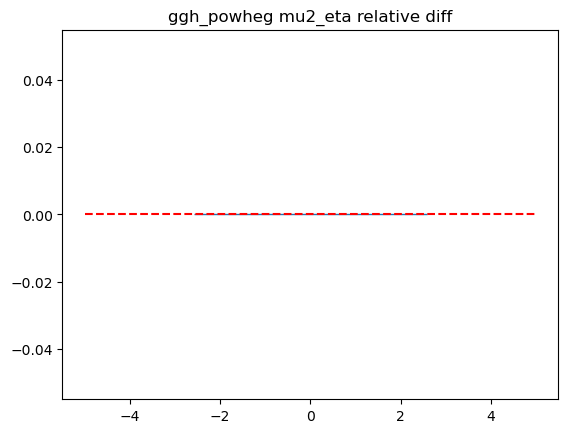

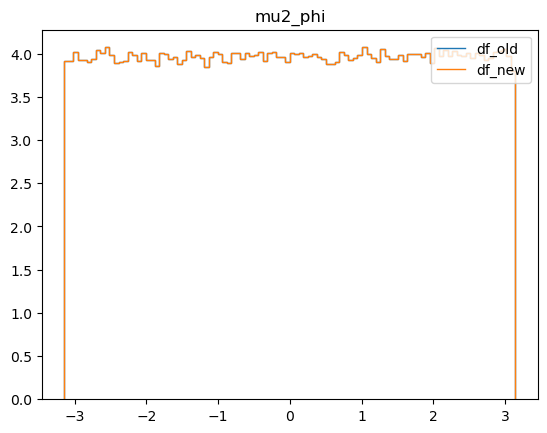

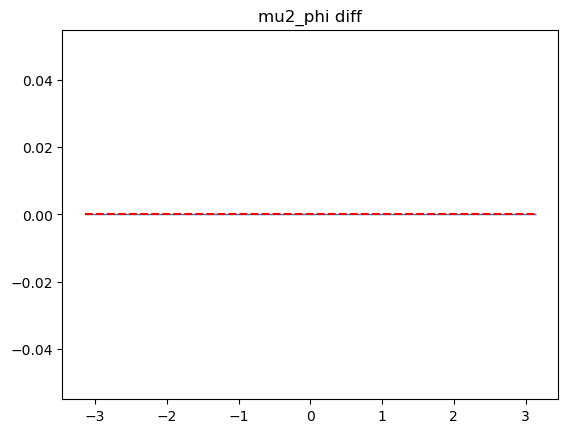

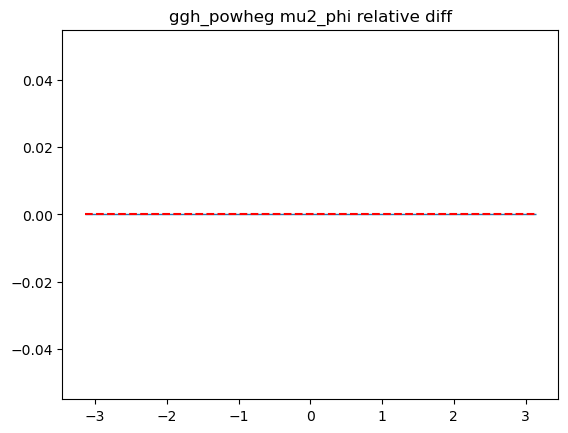

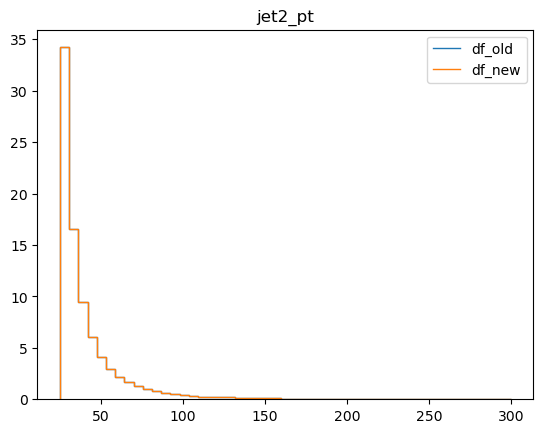

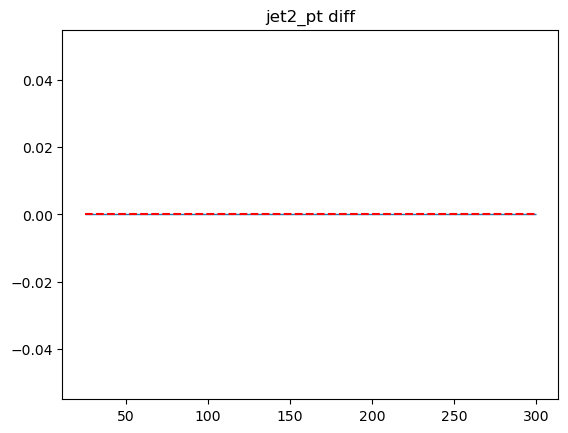

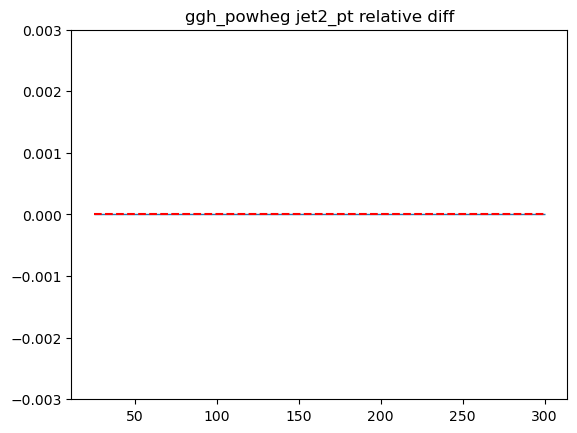

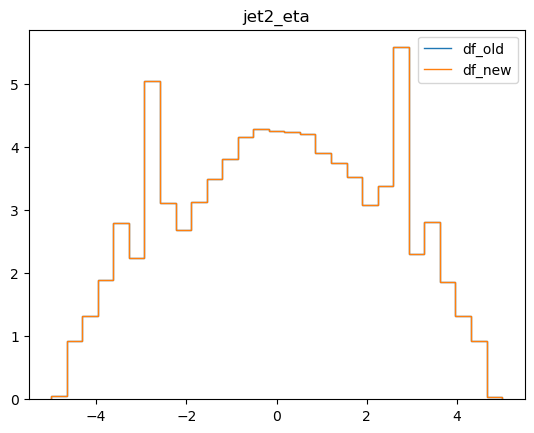

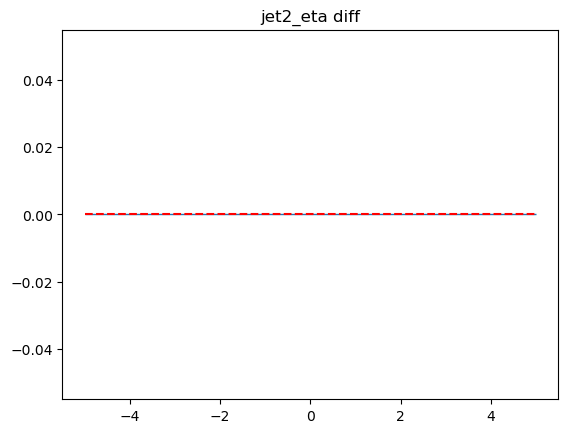

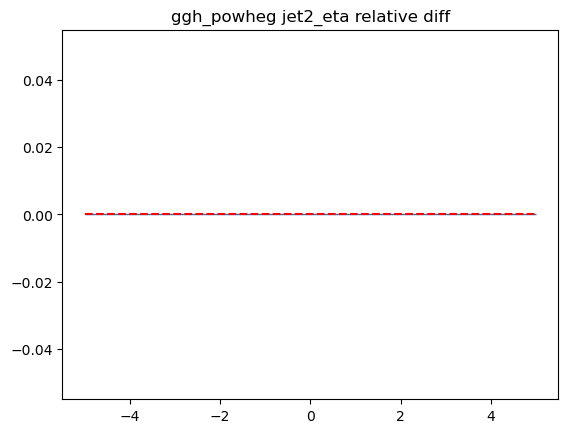

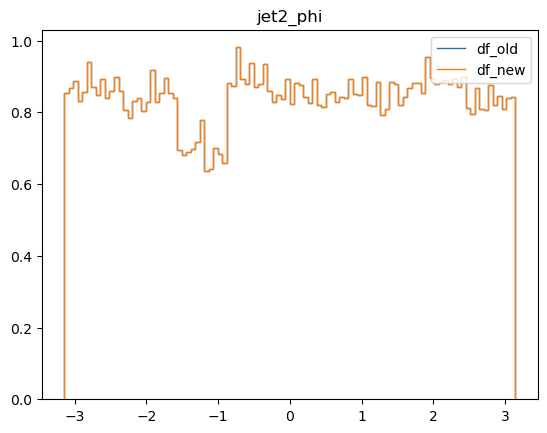

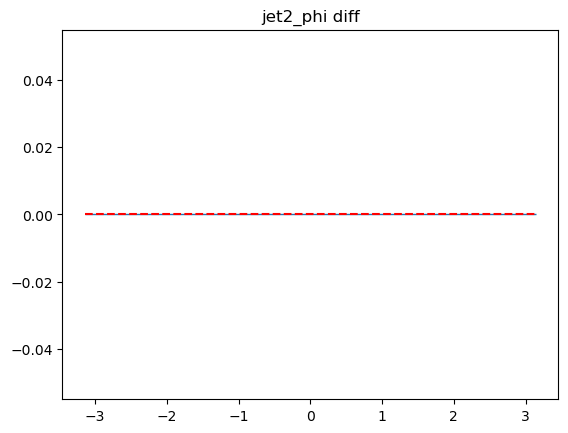

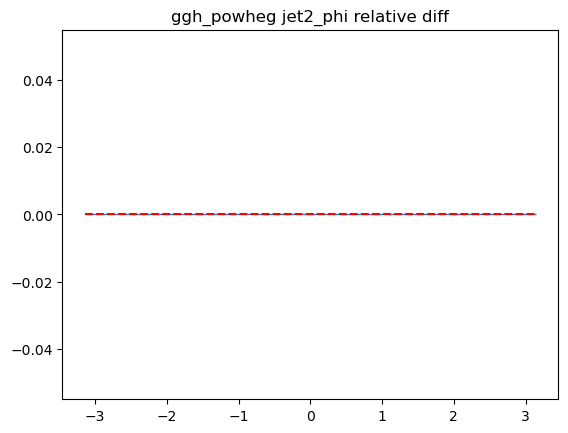

In [16]:
"""
For mu2, special condition is needed bc when there's only one muon, mu2==mu1 in copperhead
"""
# var = "mu1_pt"
# var = "dimuon_mass"
# var = "jet1_pt"
# variables = ["mu1_pt", "mu2_pt", "dimuon_mass"]
variables = ["mu2_pt","mu2_eta", "mu2_phi", 
             # "jet2_mass", 
             "jet2_pt", "jet2_eta", "jet2_phi"
            ]
weights_old = df_old["weights"].compute()
weights_new = ak.to_numpy(df_new["weights"].compute())
# if "ggh" in sample:
#     nnlops_full_load_path = f'/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/{sample}/0/nnlops/wgt.parquet'
#     nnlops_wgts = ak.from_parquet(nnlops_full_load_path)["nnlops_wgt"]
#     weights_new = weights_new*nnlops_wgts
    
for var in variables:
    kin = var.split("_")[-1]
    # binning = np.linspace(*[25, 300, 50])
    binning = np.linspace(*binning_map[kin])
    # the way copperheadV1 defines mu2 is the muon with the lowest pt, thus the
    # only way to make copperheadV1 and copperheadV2 same is to ensure nmuons ==2
    # if 'mu' in var:
    #     nvars_new = df_new["nmuons"].compute()
    #     nvars_old = df_old["nmuons"].compute()
    # else:
    #     nvars_new = df_new["njets"].compute()
    #     nvars_old = df_old["njets"].compute()
    # hist_old, edges = np.histogram(df_old[nvars_old ==2][var].compute(), bins=binning , weights=weights_old[nvars_old ==2])
    # hist_new, _= np.histogram(df_new[nvars_new ==2][var].compute(), bins=binning , weights=weights_new[nvars_new ==2])
    hist_old, edges = np.histogram(df_old[var].compute(), bins=binning , weights=weights_old)
    hist_new, _= np.histogram(df_new[var].compute(), bins=binning , weights=weights_new)
    
    
    plt.stairs(hist_old, edges, label = "df_old")
    plt.stairs(hist_new, edges, label = "df_new")
    plt.legend(loc="upper right")
    plt.title(var)
    plt.show()
    plt.stairs((hist_new-hist_old), edges)
    plt.title(var+" diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()
    plt.stairs((hist_new-hist_old)/hist_old, edges)
    if "pt" in var:
        plt.ylim(-0.003, 0.003)
    plt.title(f"{sample} {var}"+" relative diff")
    plt.hlines(0, min(edges), max(edges), colors='red', linestyles="dashed")
    plt.show()

In [9]:
! ls /depot/cms/users/yun79/results/stage1/singleBig/2018/f1_0/
! ls /depot/cms/users/yun79/results/stage1/manyBig/2018/f1_0/


ggh_powheg
ggh_powheg
